<a href="https://colab.research.google.com/github/lalithayannam/Spotify/blob/main/EV_Charging_Station_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **3: Data Preparation**

## **3.1: Data Cleansing**

### **3.1.1: Load and Inspect the Data**


In [ ]:
import pandas as pd
import numpy as np

# Load the dirty dataset you created
df = pd.read_csv('ev_station_dataset_dirty.csv')

# Get a quick overview of the data
print("First 5 Rows:")
print(df.head())
print("\nDataset Info:")
df.info()

First 5 Rows:
   Station_ID   Station_Name  Latitude  Longitude     City      State  \
0       10000   ShanghaiEV_B  41.46228  103.06436   Chenai  TamilNadu   
1       10001     DelhiEV_C   36.79066  128.90732   Mumbai    Jiangsu   
2       10002   ChennaiEV_E   14.83529   94.25447  Nanjing  TamilNadu   
3       10003     DelhiEV_C   45.59940  138.90188   Mumbai      Delhi   
4       10004     MumbaiEV_D  55.91196  110.79429  Nanjing  TamilNadu   

   EV_Level1_EVSE_Num  EV_Level2_EVSE_Num  EV_DC_Fast_Count  \
0                 4.0                11.0               NaN   
1                 8.0                 5.0               5.0   
2                 7.0                 6.0               5.0   
3                 8.0                19.0               6.0   
4                 7.0                15.0               3.0   

  EV_Connector_Types  ... Energy_Source Grid_Capacity_kW Charging_Speed_kW  \
0                CCS  ...   Grid, Solar               99               138   
1           

### **3.1.2: Handle Duplicate Rows**

In [ ]:
# Check for duplicate rows
duplicate_rows = df[df.duplicated()]
print(f"Found {len(duplicate_rows)} duplicate rows.")

# Remove the duplicates
df.drop_duplicates(inplace=True)
print("Duplicate rows have been removed.")

Found 3 duplicate rows.
Duplicate rows have been removed.


### **3.1.3: Correct Typos and Inconsistencies**


In [ ]:
# Fix typos in the 'City' and 'State' columns
df['City'] = df['City'].replace('Chenai', 'Chennai')
df['State'] = df['State'].replace('TamilNadu', 'Tamil Nadu')

print("Typos in 'City' and 'State' corrected.")

Typos in 'City' and 'State' corrected.


### **3.1.4: Trim Leading/Trailing Spaces**

In [ ]:
# Remove leading/trailing whitespace from the Station_Name column
df['Station_Name'] = df['Station_Name'].str.strip()

print("Extra whitespace from 'Station_Name' has been removed.")

Extra whitespace from 'Station_Name' has been removed.


### **3.1.5: Address Missing Data (Imputation)**

In [ ]:
# Identify columns with missing values
print("\nColumns with missing values:")
print(df.isnull().sum())

# Impute missing values for numeric columns with the median
for col in ['EV_Level1_EVSE_Num', 'EV_Level2_EVSE_Num', 'EV_DC_Fast_Count']:
    median_value = df[col].median()
    df[col].fillna(median_value, inplace=True)

print("\nMissing numeric data has been imputed with the median.")


Columns with missing values:
Station_ID                     0
Station_Name                   0
Latitude                       0
Longitude                      0
City                           0
State                          0
EV_Level1_EVSE_Num           200
EV_Level2_EVSE_Num           200
EV_DC_Fast_Count             200
EV_Connector_Types             0
EV_Pricing                     0
Access_Code                    0
Access_Days_Time               0
Status_Code                    0
EV_Network                     0
Owner_Type_Code                0
Open_Date                      0
Date_Last_Confirmed            0
Energy_Source                  0
Grid_Capacity_kW               0
Charging_Speed_kW              0
Charging_Sessions_per_Day      0
Peak_Hour_Usage                0
Trip_Start_Lat                 0
Trip_End_Lon                   0
Distance_km                    0
Traffic_Volume_per_Day         0
City_Population                0
dtype: int64

Missing numeric data has been im

/tmp/ipython-input-3632890985.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median_value, inplace=True)


### **3.1.6: Identify and Handle Outliers**

In [ ]:
# Handle outliers by capping them at the 99th percentile
for col in ['Grid_Capacity_kW', 'Charging_Speed_kW']:
    percentile_99 = df[col].quantile(0.99)
    df[col] = np.where(df[col] > percentile_99, percentile_99, df[col])

print("Outliers have been handled by capping at the 99th percentile.")

Outliers have been handled by capping at the 99th percentile.


## **3.2: Data Transformation**

### **3.2.1: Data Type Conversion**

In [ ]:
# --- 1. Data Type Conversion ---
# Convert 'Open_Date' and 'Date_Last_Confirmed' from text to datetime objects
df['Open_Date'] = pd.to_datetime(df['Open_Date'])
df['Date_Last_Confirmed'] = pd.to_datetime(df['Date_Last_Confirmed'])

# Verify the changes
print("Data types after conversion:")
df.info()

Data types after conversion:
<class 'pandas.core.frame.DataFrame'>
Index: 2002 entries, 0 to 2003
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Station_ID                 2002 non-null   int64         
 1   Station_Name               2002 non-null   object        
 2   Latitude                   2002 non-null   float64       
 3   Longitude                  2002 non-null   float64       
 4   City                       2002 non-null   object        
 5   State                      2002 non-null   object        
 6   EV_Level1_EVSE_Num         2002 non-null   float64       
 7   EV_Level2_EVSE_Num         2002 non-null   float64       
 8   EV_DC_Fast_Count           2002 non-null   float64       
 9   EV_Connector_Types         2002 non-null   object        
 10  EV_Pricing                 2002 non-null   object        
 11  Access_Code                2002 non-null   ob

### **3.2.2: Feature Engineering**

### **a. Create Station_Age_Years**

In [ ]:
# --- 2a. Create Station Age ---
# Calculate the age of each station in years from its opening date
current_date = pd.to_datetime('2025-10-05')
df['Station_Age_Years'] = (current_date - df['Open_Date']).dt.days / 365.25

print("Created 'Station_Age_Years' column.")

Created 'Station_Age_Years' column.


### **b. Create Total_EVSEs**

In [ ]:
# --- 2b. Create Total Chargers ---
# Sum up all charger types to get a total count per station
df['Total_EVSEs'] = df['EV_Level1_EVSE_Num'] + df['EV_Level2_EVSE_Num'] + df['EV_DC_Fast_Count']

print("Created 'Total_EVSEs' column.")

Created 'Total_EVSEs' column.


### **c. Create Has_DC_Fast_Charger**

In [ ]:
# --- 2c. Create Fast Charger Flag ---
# Create a boolean flag that is True if the station has a DC Fast Charger
df['Has_DC_Fast_Charger'] = df['EV_DC_Fast_Count'] > 0

print("Created 'Has_DC_Fast_Charger' column.")

Created 'Has_DC_Fast_Charger' column.


### **3.2.3: Binning**

In [ ]:
# --- 3. Binning ---
# Group 'Station_Age_Years' into 'New', 'Established', and 'Old' categories
bins = [0, 2, 5, float('inf')] # Bins: 0-2 years, 2-5 years, 5+ years
labels = ['New', 'Established', 'Old']
df['Station_Age_Category'] = pd.cut(df['Station_Age_Years'], bins=bins, labels=labels, right=False)

print("Created 'Station_Age_Category' column.")

Created 'Station_Age_Category' column.


### **3.2.4: Handling Categorical Data (Encoding)**

In [ ]:
# --- 4. Handling Categorical Data ---
# One-hot encode the 'Access_Code' column to convert it into numbers
access_code_dummies = pd.get_dummies(df['Access_Code'], prefix='Access')

# Add the new columns to the DataFrame
df = pd.concat([df, access_code_dummies], axis=1)

# Drop the original text column
df.drop('Access_Code', axis=1, inplace=True)

print("One-hot encoded the 'Access_Code' column.")

One-hot encoded the 'Access_Code' column.


### **3.2.5: Normalization / Standardization**

In [ ]:
from sklearn.preprocessing import StandardScaler

# --- 5. Normalization / Standardization ---
# Select the numerical columns you want to scale
cols_to_scale = [
    'Grid_Capacity_kW', 'Charging_Speed_kW', 'Traffic_Volume_per_Day',
    'City_Population', 'Station_Age_Years', 'Total_EVSEs', 'Distance_km'
]

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler to the data and transform it
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

print("Numerical features have been scaled.")

Numerical features have been scaled.


## **3.3: Combining data**

###**3.3.1: Creating views**

### **a. View of Active Stations**

In [ ]:
# --- 3a. Create a View of Active Stations ---

# Filter the DataFrame to get rows where Status_Code is 'ACTIVE'
active_stations_view = df[df['Status_Code'] == 'ACTIVE'].copy()

print("--- View 1: Active Stations Only ---")
print(f"Total stations: {len(df)}")
print(f"Active stations: {len(active_stations_view)}")
print(active_stations_view[['Station_Name', 'City', 'Status_Code']].head())

--- View 1: Active Stations Only ---
Total stations: 2002
Active stations: 683
    Station_Name      City Status_Code
7   ShanghaiEV_B  Shanghai      ACTIVE
17   ChennaiEV_E  Shanghai      ACTIVE
18    MumbaiEV_D  Shanghai      ACTIVE
22     DelhiEV_C   Chennai      ACTIVE
24     DelhiEV_C  Shanghai      ACTIVE


### **b. View of High-Capacity Stations**

In [ ]:
# --- 3b. Create a View of High-Capacity Stations ---

# Filter for stations where Grid_Capacity_kW is greater than 150
high_capacity_view = df[df['Grid_Capacity_kW'] > 150].copy()

print("\n--- View 2: High-Capacity Stations (>150 kW) ---")
print(f"Total high-capacity stations: {len(high_capacity_view)}")
print(high_capacity_view[['Station_Name', 'City', 'Grid_Capacity_kW']].head())


--- View 2: High-Capacity Stations (>150 kW) ---
Total high-capacity stations: 0
Empty DataFrame
Columns: [Station_Name, City, Grid_Capacity_kW]
Index: []


# **4. Data Exploration**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set a style for our plots
sns.set_style("whitegrid")

In [ ]:
# --- 1. Understand the Data ---

# Display the first few rows
print("--- First 5 Rows ---")
print(df.head())

# Display a concise summary of the DataFrame (data types, non-null counts)
print("\n--- DataFrame Info ---")
df.info()

# Display descriptive statistics for numerical columns (mean, std, quartiles, etc.)
print("\n--- Descriptive Statistics ---")
print(df.describe())

--- First 5 Rows ---
   Station_ID  Station_Name  Latitude  Longitude     City       State  \
0       10000  ShanghaiEV_B  41.46228  103.06436  Chennai  Tamil Nadu   
1       10001     DelhiEV_C  36.79066  128.90732   Mumbai     Jiangsu   
2       10002   ChennaiEV_E  14.83529   94.25447  Nanjing  Tamil Nadu   
3       10003     DelhiEV_C  45.59940  138.90188   Mumbai       Delhi   
4       10004    MumbaiEV_D  55.91196  110.79429  Nanjing  Tamil Nadu   

   EV_Level1_EVSE_Num  EV_Level2_EVSE_Num  EV_DC_Fast_Count  \
0                 4.0                11.0               4.0   
1                 8.0                 5.0               5.0   
2                 7.0                 6.0               5.0   
3                 8.0                19.0               6.0   
4                 7.0                15.0               3.0   

  EV_Connector_Types  ... Trip_End_Lon Distance_km Traffic_Volume_per_Day  \
0                CCS  ...     93.56095   -1.431691              -0.434391   
1      

## **4.1: Simple Graphs**

### **Simple graphs: Univariate Analysis**

### **a: Categorical variables**

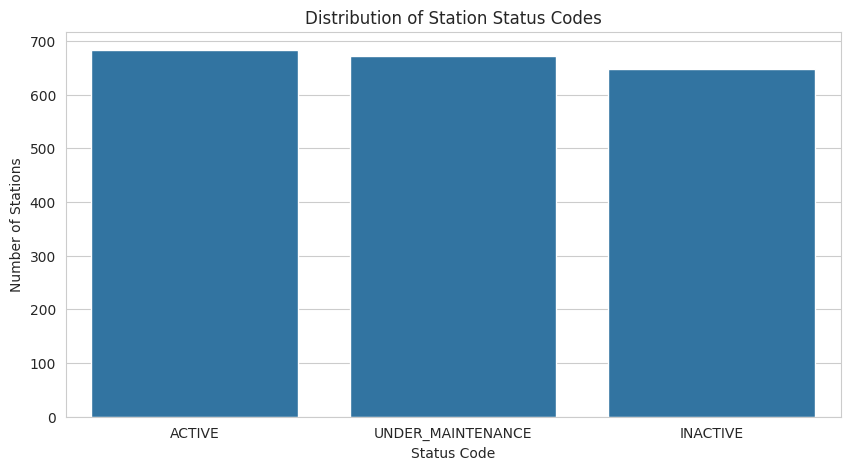

In [ ]:
# --- 2a. Univariate Analysis: Categorical ---

# Set the figure size
plt.figure(figsize=(10, 5))

# Create a count plot for the 'Status_Code'
sns.countplot(data=df, x='Status_Code', order=df['Status_Code'].value_counts().index)
plt.title('Distribution of Station Status Codes')
plt.xlabel('Status Code')
plt.ylabel('Number of Stations')
plt.show()

### **b. Numerical Variables**

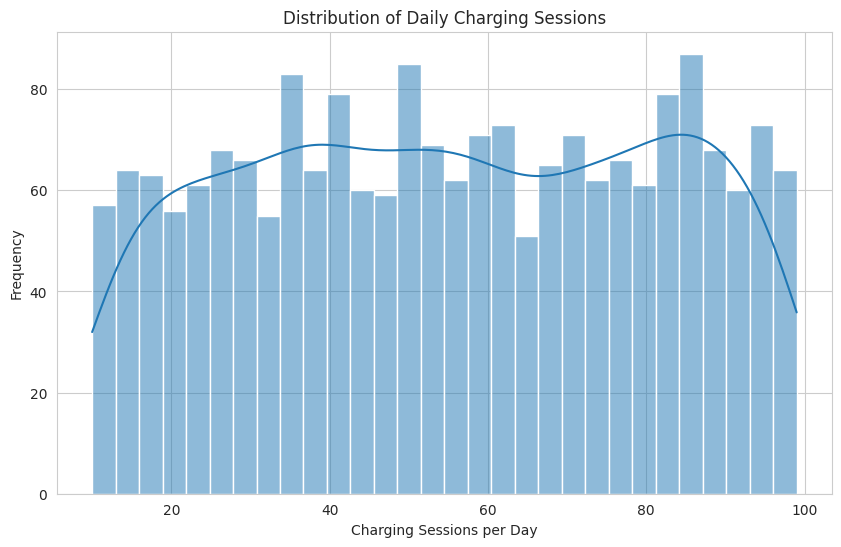

In [ ]:
# --- Simple Graph: Histogram ---
plt.figure(figsize=(10, 6))
sns.histplot(df['Charging_Sessions_per_Day'], kde=True, bins=30)
plt.title('Distribution of Daily Charging Sessions')
plt.xlabel('Charging Sessions per Day')
plt.ylabel('Frequency')
plt.show()

### **Simple graphs: Bivariate Numerical**

### **a. Scatter Plot (Numerical vs. Numerical)**

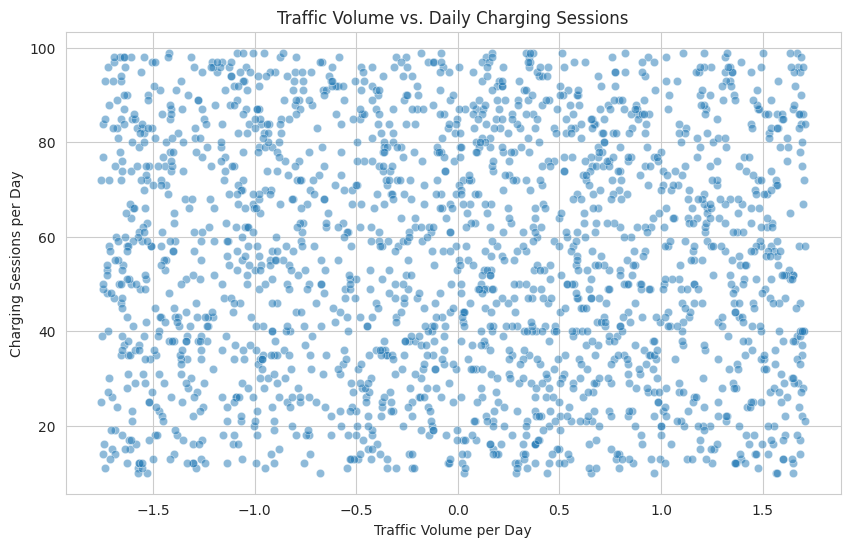

In [ ]:
# --- 3a. Bivariate Analysis: Scatter Plot ---

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Traffic_Volume_per_Day', y='Charging_Sessions_per_Day', alpha=0.5)
plt.title('Traffic Volume vs. Daily Charging Sessions')
plt.xlabel('Traffic Volume per Day')
plt.ylabel('Charging Sessions per Day')
plt.show()

### **4.2: Combined Graphs**

### **a.Correlation Heatmap**

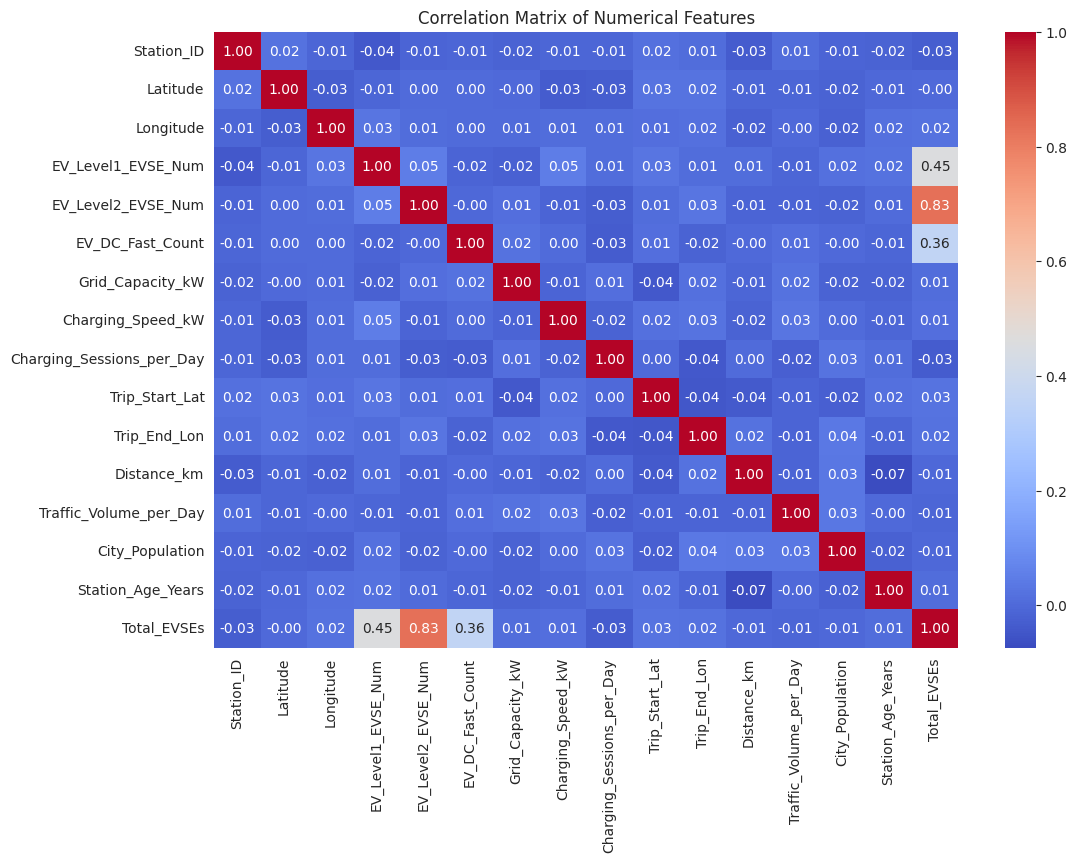

In [ ]:
# --- 3b. Bivariate Analysis: Heatmap ---

# Select only the numerical columns for the correlation matrix
numerical_cols = df.select_dtypes(include=np.number)

plt.figure(figsize=(12, 8))
sns.heatmap(numerical_cols.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

### **b.Side-by-Side Plots (Histogram and Box Plot)**

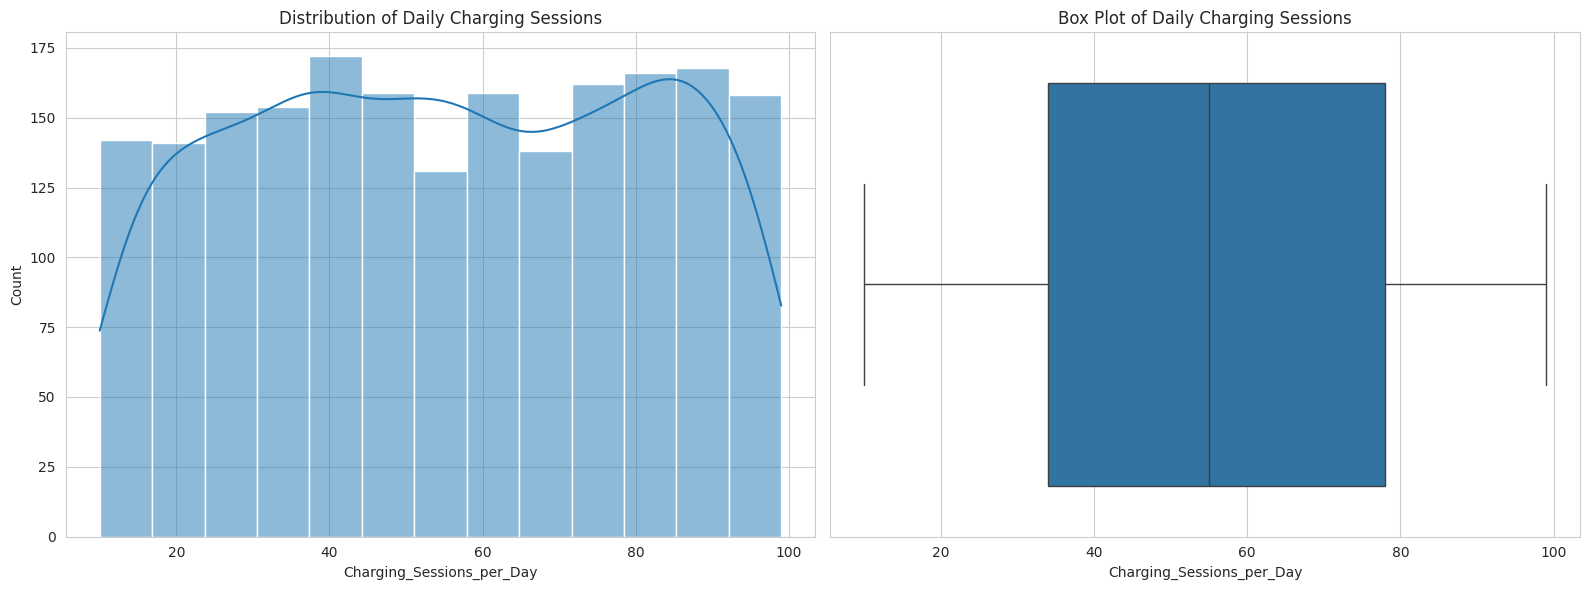

In [ ]:
# --- Combined Graph: Side-by-Side Plots ---
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Histogram
sns.histplot(df['Charging_Sessions_per_Day'], kde=True, ax=axes[0])
axes[0].set_title('Distribution of Daily Charging Sessions')

# Plot 2: Box Plot
sns.boxplot(x=df['Charging_Sessions_per_Day'], ax=axes[1])
axes[1].set_title('Box Plot of Daily Charging Sessions')

plt.tight_layout()
plt.show()

### **4.3: Nongraphical Techniques**

In [ ]:
# --- Nongraphical Techniques ---

# 1. Display the first few rows to inspect the data
print("--- First 5 Rows (df.head()) ---")
print(df.head())

# 2. Get a concise summary of the DataFrame (data types, non-null counts)
print("\n--- DataFrame Info (df.info()) ---")
df.info()

# 3. Calculate descriptive statistics for numerical columns
print("\n--- Descriptive Statistics (df.describe()) ---")
print(df.describe())

# 4. Calculate the correlation matrix (the table of numbers behind the heatmap)
print("\n--- Correlation Matrix (df.corr()) ---")
# Select only numerical columns to calculate correlation
numerical_cols = df.select_dtypes(include=np.number)
print(numerical_cols.corr())

--- First 5 Rows (df.head()) ---
   Station_ID  Station_Name  Latitude  Longitude     City       State  \
0       10000  ShanghaiEV_B  41.46228  103.06436  Chennai  Tamil Nadu   
1       10001     DelhiEV_C  36.79066  128.90732   Mumbai     Jiangsu   
2       10002   ChennaiEV_E  14.83529   94.25447  Nanjing  Tamil Nadu   
3       10003     DelhiEV_C  45.59940  138.90188   Mumbai       Delhi   
4       10004    MumbaiEV_D  55.91196  110.79429  Nanjing  Tamil Nadu   

   EV_Level1_EVSE_Num  EV_Level2_EVSE_Num  EV_DC_Fast_Count  \
0                 4.0                11.0               4.0   
1                 8.0                 5.0               5.0   
2                 7.0                 6.0               5.0   
3                 8.0                19.0               6.0   
4                 7.0                15.0               3.0   

  EV_Connector_Types  ... Trip_End_Lon Distance_km Traffic_Volume_per_Day  \
0                CCS  ...     93.56095   -1.431691              -0.43439

## **5. Data Modeling**

In [ ]:
# Import libraries for modeling and evaluation
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd

# Assume 'df' is your fully preprocessed DataFrame from the previous steps

### **5.1: Model and variable selection**

In [ ]:
# --- 1. Model and Variable Selection ---

# a. Define Your Features (X) and Target (y)
print("Selecting features and target variable...")
target_variable = 'Charging_Sessions_per_Day'

# Select features that are likely to be good predictors
# We exclude non-numeric columns and identifiers
features = [
    'Grid_Capacity_kW', 'Charging_Speed_kW', 'Traffic_Volume_per_Day',
    'City_Population', 'Station_Age_Years', 'Total_EVSEs', 'Distance_km',
    'Has_DC_Fast_Charger', 'Access_PUBLIC' # Include our engineered features
]

X = df[features]
y = df[target_variable]

# b. Split the Data into Training and Testing Sets
# 80% for training the model, 20% for testing its performance
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Data split complete: {len(X_train)} training samples and {len(X_test)} testing samples.")

Selecting features and target variable...
Data split complete: 1601 training samples and 401 testing samples.


### **5.2: Model Execution**

In [ ]:
# --- 2. Model Execution ---

# a. Initialize the models
print("\nInitializing models...")
linear_model = LinearRegression()
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)

# b. Train the models on the training data
print("Training Linear Regression model...")
linear_model.fit(X_train, y_train)

print("Training Random Forest Regressor model...")
random_forest_model.fit(X_train, y_train)

print("Models have been successfully trained.")


Initializing models...
Training Linear Regression model...
Training Random Forest Regressor model...
Models have been successfully trained.


**5.3: Model Diagnostics and Comparison**


Making predictions on the test set...
Evaluating model performance...

--- Model Comparison ---
Linear Regression:
  - Mean Absolute Error (MAE): 22.33
  - R-squared (R²): -0.00
-------------------------
Random Forest Regressor:
  - Mean Absolute Error (MAE): 22.89
  - R-squared (R²): -0.06
-------------------------


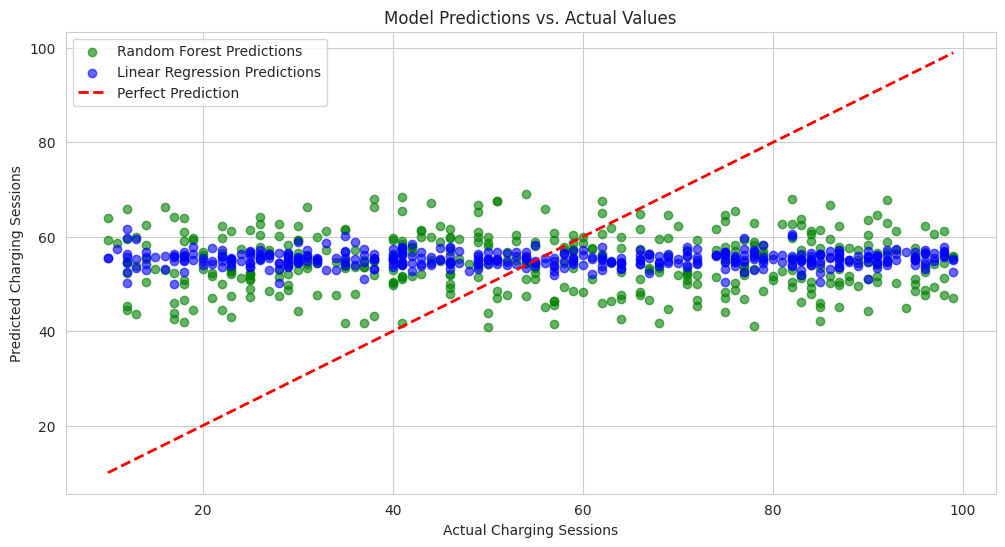

In [ ]:
# --- 3. Model Diagnostics and Comparison ---

# a. Make predictions on the test set
print("\nMaking predictions on the test set...")
y_pred_linear = linear_model.predict(X_test)
y_pred_rf = random_forest_model.predict(X_test)

# b. Evaluate the models
print("Evaluating model performance...")
# Linear Regression Metrics
mae_linear = mean_absolute_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

# Random Forest Metrics
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# c. Compare the models
print("\n--- Model Comparison ---")
print(f"Linear Regression:")
print(f"  - Mean Absolute Error (MAE): {mae_linear:.2f}")
print(f"  - R-squared (R²): {r2_linear:.2f}")
print("-" * 25)
print(f"Random Forest Regressor:")
print(f"  - Mean Absolute Error (MAE): {mae_rf:.2f}")
print(f"  - R-squared (R²): {r2_rf:.2f}")
print("-" * 25)

# d. Visualize the results
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.6, color='green', label='Random Forest Predictions')
plt.scatter(y_test, y_pred_linear, alpha=0.6, color='blue', label='Linear Regression Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', lw=2, color='red', label='Perfect Prediction')
plt.xlabel("Actual Charging Sessions")
plt.ylabel("Predicted Charging Sessions")
plt.title("Model Predictions vs. Actual Values")
plt.legend()
plt.show()

In [ ]:
df['traffic_x_capacity'] = df['Traffic_Volume_per_Day'] * df['Grid_Capacity_kW']

In [ ]:
# Apply a log transform (add 1 to avoid log(0))
df['log_sessions'] = np.log1p(df['Charging_Sessions_per_Day'])
# You would then use 'log_sessions' as your new target 'y'

In [ ]:
# --- 1. Model Execution: XGBoost ---

# You might need to install the library first. Run this line in a cell if needed:
# !pip install xgboost

from xgboost import XGBRegressor

# a. Initialize the XGBoost model
# We'll start with some standard parameters.
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# b. Train the model on the training data
print("Training XGBoost Regressor model...")
xgb_model.fit(X_train, y_train)

print("XGBoost model has been successfully trained.")

Training XGBoost Regressor model...
XGBoost model has been successfully trained.



Making predictions with XGBoost model...
Evaluating XGBoost performance...

--- Final Model Comparison ---
Linear Regression:
  - Mean Absolute Error (MAE): 22.33
  - R-squared (R²): -0.00
------------------------------
Random Forest Regressor:
  - Mean Absolute Error (MAE): 22.89
  - R-squared (R²): -0.06
------------------------------
XGBoost Regressor:
  - Mean Absolute Error (MAE): 23.59
  - R-squared (R²): -0.15
------------------------------


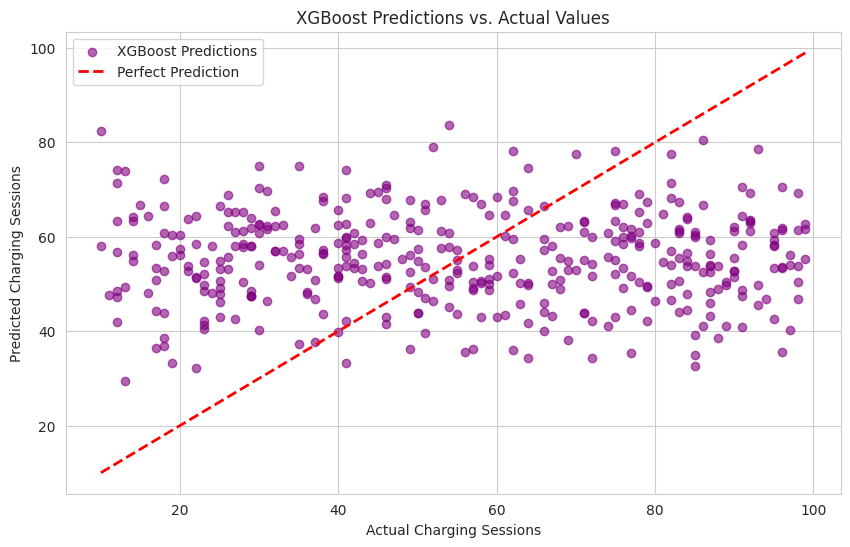

In [ ]:
# --- 2. Model Diagnostics and Comparison ---

# a. Make predictions with the trained XGBoost model
print("\nMaking predictions with XGBoost model...")
y_pred_xgb = xgb_model.predict(X_test)

# b. Calculate the performance metrics for XGBoost
print("Evaluating XGBoost performance...")
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

# c. Display a final comparison of all three models
# (Assuming you still have the previous scores stored in variables like 'mae_linear', 'r2_linear', etc.)
print("\n--- Final Model Comparison ---")

print("Linear Regression:")
print(f"  - Mean Absolute Error (MAE): {mae_linear:.2f}")
print(f"  - R-squared (R²): {r2_linear:.2f}")
print("-" * 30)

print("Random Forest Regressor:")
print(f"  - Mean Absolute Error (MAE): {mae_rf:.2f}")
print(f"  - R-squared (R²): {r2_rf:.2f}")
print("-" * 30)

print("XGBoost Regressor:")
print(f"  - Mean Absolute Error (MAE): {mae_xgb:.2f}")
print(f"  - R-squared (R²): {r2_xgb:.2f}")
print("-" * 30)

# d. Visualize the XGBoost predictions
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_xgb, alpha=0.6, color='purple', label='XGBoost Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', lw=2, color='red', label='Perfect Prediction')
plt.xlabel("Actual Charging Sessions")
plt.ylabel("Predicted Charging Sessions")
plt.title("XGBoost Predictions vs. Actual Values")
plt.legend()
plt.show()

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

# Select a few key features to combine
poly_features = ['Traffic_Volume_per_Day', 'Grid_Capacity_kW', 'City_Population']
X_poly = df[poly_features]

# Create the polynomial features transformer (degree=2 creates interactions)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly_transformed = poly.fit_transform(X_poly)

# Create a new DataFrame with these new features
df_poly = pd.DataFrame(X_poly_transformed, columns=poly.get_feature_names_out(poly_features))

# You can now add these new features to your main feature set 'X' and retrain your model

In [ ]:
from sklearn.model_selection import GridSearchCV

# --- Hyperparameter Tuning ---

# 1. Define the model you want to tune
rf = RandomForestRegressor(random_state=42)

# 2. Define the 'grid' of settings to test
# These are some of the most important settings for a Random Forest
param_grid = {
    'n_estimators': [100, 200],         # Number of trees in the forest
    'max_depth': [10, 20, None],       # Maximum depth of the tree
    'min_samples_leaf': [1, 2, 4]      # Minimum number of samples required at a leaf node
}

# 3. Set up the grid search
# cv=3 means it will use 3-fold cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# 4. Run the grid search on your training data
grid_search.fit(X_train, y_train)

# 5. Print the best settings found
print("Best parameters found:", grid_search.best_params_)

# 6. Use the best model for predictions
best_rf_model = grid_search.best_estimator_
y_pred_best_rf = best_rf_model.predict(X_test)

# Now, re-evaluate the R² and MAE with this tuned model
print("\n--- Tuned Random Forest Performance ---")
print(f"MAE: {mean_absolute_error(y_test, y_pred_best_rf):.2f}")
print(f"R-squared: {r2_score(y_test, y_pred_best_rf):.2f}")

Fitting 3 folds for each of 18 candidates, totalling 54 fits
Best parameters found: {'max_depth': 10, 'min_samples_leaf': 2, 'n_estimators': 200}

--- Tuned Random Forest Performance ---
MAE: 22.46
R-squared: -0.02


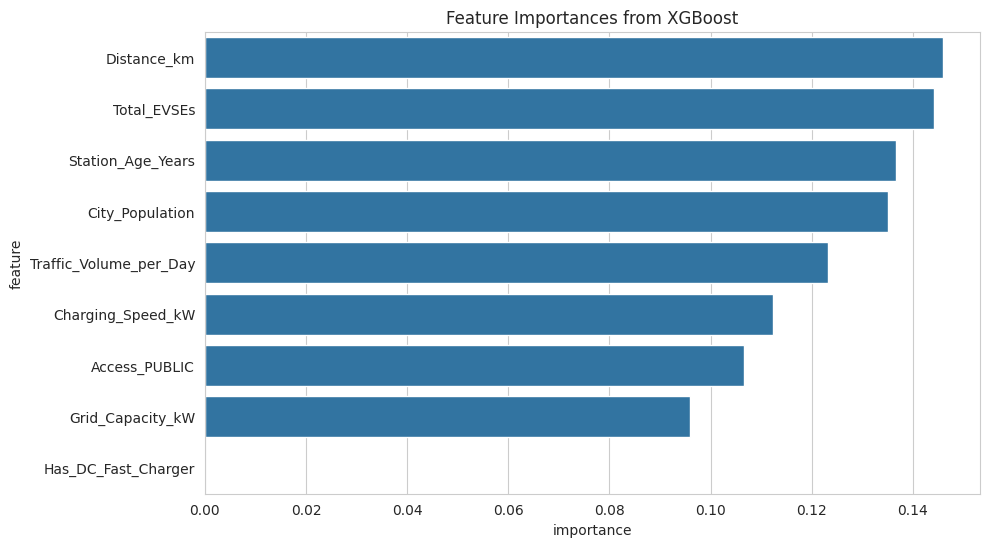


Top 5 most important features: ['Distance_km', 'Total_EVSEs', 'Station_Age_Years', 'City_Population', 'Traffic_Volume_per_Day']


In [ ]:
# --- Feature Selection ---

# 1. Train a model (we'll use the XGBoost model from before)
xgb_model.fit(X_train, y_train)

# 2. Get the feature importances
importances = xgb_model.feature_importances_
feature_names = X_train.columns

# 3. Create a DataFrame for visualization
importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
importance_df = importance_df.sort_values('importance', ascending=False)

# 4. Visualize the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=importance_df)
plt.title('Feature Importances from XGBoost')
plt.show()

# 5. Select only the top N features
# For example, let's select the top 5 most important features
top_features = importance_df['feature'].head(5).tolist()
print("\nTop 5 most important features:", top_features)

# Now, create a new training set with only these features and retrain your model
X_train_selected = X_train[top_features]
X_test_selected = X_test[top_features]

# Retrain and re-evaluate your model on this smaller feature set